<a href="https://colab.research.google.com/github/Resia05/supervised-learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22Only_EDA_HW_2_7_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn_ipyn%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорт бібліотек

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
import joblib
import warnings

# Завантаження даних

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [3]:
train_orig_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/train.csv")
test_orig_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/test.csv")
sample_submission_orig_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/sample_submission.csv")

# Розбиття даних та колонок

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [4]:
# Визначимо назви колонок
input_cols = ['id', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_col = 'Exited'

# Виділяємо матрицю ознак та цільову змінну
X = train_orig_df[input_cols]
y = train_orig_df[target_col]

# Розділимо дані на навчально-валідаційний і тестовий набори з використанням stratify і random_state
train_val_df, test_df, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Розділимо навчально-валідаційний набір на власне навчальний і валідаційний набори
train_df, val_df, y_train, y_val = train_test_split(train_val_df, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Створимо відповідні DataFrame для вхідних даних та цільових значень
train_inputs = train_df
train_targets = y_train
val_inputs = val_df
val_targets = y_val
test_inputs = test_df
test_targets = y_test

# Перевіримо розподіл класів у кожній частині
print("Training dataset class distribution:", train_targets.value_counts(normalize=True))
print("Validation dataset class distribution:", val_targets.value_counts(normalize=True))
print("Test dataset class distribution:", test_targets.value_counts(normalize=True))

Training dataset class distribution: Exited
0.0    0.796556
1.0    0.203444
Name: proportion, dtype: float64
Validation dataset class distribution: Exited
0.0    0.796333
1.0    0.203667
Name: proportion, dtype: float64
Test dataset class distribution: Exited
0.0    0.796667
1.0    0.203333
Name: proportion, dtype: float64


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [5]:
# Визначимо числові та категоріальні колонки
numeric_cols = train_orig_df.select_dtypes(include='number').columns
categorical_cols = train_orig_df.select_dtypes(include='object').columns
analysis_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'] #окремо визначила колонку без ID
id_cols = ['id']

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print("Analysis columns:", analysis_cols)
print("Id columns:", id_cols)

Numeric columns: Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical columns: Index(['Surname', 'Geography', 'Gender'], dtype='object')
Analysis columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Id columns: ['id']


In [6]:
train_orig_df.shape

(15000, 14)

In [7]:
train_orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


# Підготовка даних

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [8]:
# Перевірка пропусків та нулів
def check_missing(df):
    # Кількість пропущених значень
    missing_count = df.isnull().sum()

    # Кількість нулів
    zero_count = (df == 0).sum()

    # Загальна кількість записів
    total_count = df.shape[0]

    # Відсоток пропущених значень
    missing_percentage = (missing_count / total_count) * 100

    # Відсоток нулів
    zero_percentage = (zero_count / total_count) * 100

    # Створення DataFrame для результатів
    result_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Zero Count': zero_count,
        'Missing Percentage': missing_percentage,
        'Zero Percentage': zero_percentage
    })

    return result_df

In [9]:
# Перевірка пропусків та нулів на повному наборі даних
print("Missing and Zero Values in train_orig_df:")
missing_zero_train_orig_df = check_missing(train_orig_df)
print(missing_zero_train_orig_df)

# Перевірка пропусків та нулів на відокремлених наборах
print("\nMissing and Zero Values in train_inputs:")
missing_zero_train_inputs = check_missing(train_inputs)
print(missing_zero_train_inputs)

print("\nMissing and Zero Values in val_inputs:")
missing_zero_val_inputs = check_missing(val_inputs)
print(missing_zero_val_inputs)

print("\nMissing and Zero Values in test_inputs:")
missing_zero_test_inputs = check_missing(test_inputs)
print(missing_zero_test_inputs)

Missing and Zero Values in train_orig_df:
                 Missing Count  Zero Count  Missing Percentage  \
id                           0           1                 0.0   
CustomerId                   0           0                 0.0   
Surname                      0           0                 0.0   
CreditScore                  0           0                 0.0   
Geography                    0           0                 0.0   
Gender                       0           0                 0.0   
Age                          0           0                 0.0   
Tenure                       0         394                 0.0   
Balance                      0        9742                 0.0   
NumOfProducts                0           0                 0.0   
HasCrCard                    0        3168                 0.0   
IsActiveMember               0        7655                 0.0   
EstimatedSalary              0           0                 0.0   
Exited                       0    

In [10]:
train_orig_df[numeric_cols].describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.569146e+07,658.944133,37.739600,5.025267,42729.791988,1.590933,0.788800,0.489667,117784.666193,0.203467
std,4330.271354,1.352050e+05,72.255926,8.218363,2.776678,59727.309419,0.532306,0.408174,0.499910,45734.445888,0.402590
min,0.000000,1.581102e+06,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563514e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83058.140000,0.000000
50%,7499.500000,1.569018e+07,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123584.870000,0.000000
75%,11249.250000,1.575718e+07,708.000000,42.000000,7.000000,109531.017500,2.000000,1.000000,1.000000,156884.705000,0.000000
max,14999.000000,1.581569e+07,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
def check_normality(data):
    for col in data.columns:
        print(f"Checking normality for column: {col}")

        # Гістограма
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col}')

        # Q-Q діаграма
        plt.subplot(1, 2, 2)
        stats.probplot(data[col], dist="norm", plot=plt)
        plt.title(f'Q-Q plot of {col}')

        plt.show()

        # Тест Шапіро-Уілка (підходить для невеликих наборів даних)
        if data[col].size <= 5000:
            shapiro_test = stats.shapiro(data[col])
            print(f'Shapiro-Wilk test for {col}: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

        # Тест Д'Агостіно
        dagostino_test = stats.normaltest(data[col])
        print(f'D\'Agostino test for {col}: Statistic={dagostino_test.statistic}, p-value={dagostino_test.pvalue}')

        print("\n")


Checking normality for column: CreditScore


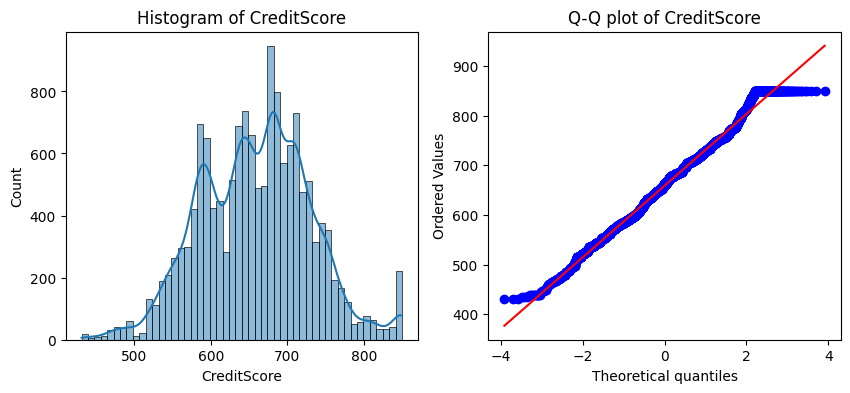

D'Agostino test for CreditScore: Statistic=5.624625429029583, p-value=0.06006591631622384


Checking normality for column: Age


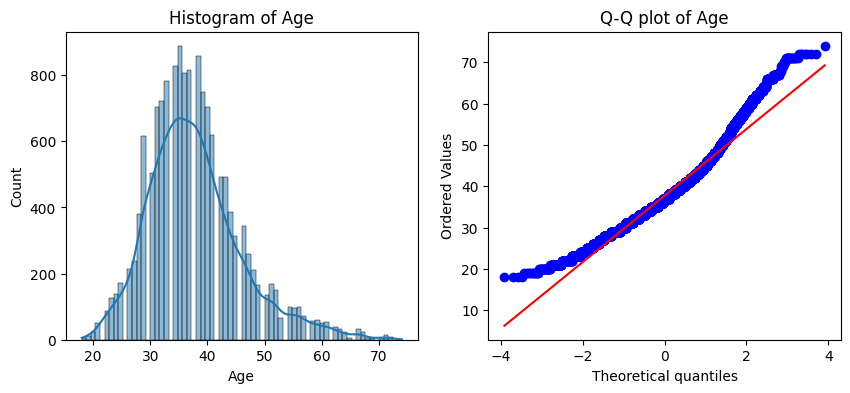

D'Agostino test for Age: Statistic=1718.0244417817155, p-value=0.0


Checking normality for column: Tenure


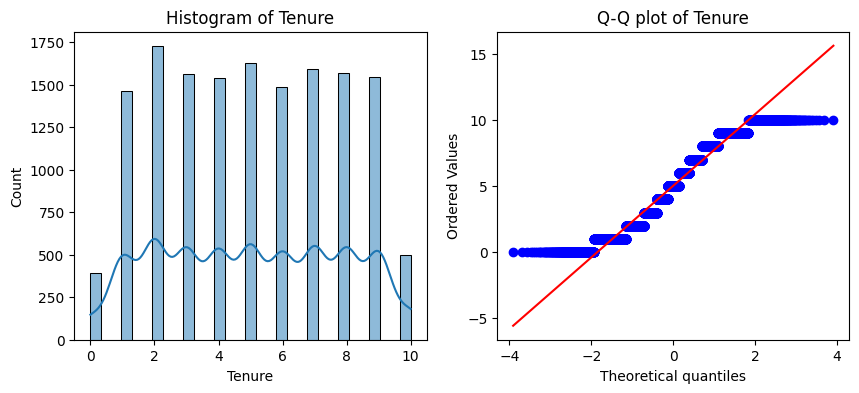

D'Agostino test for Tenure: Statistic=8983.3306496916, p-value=0.0


Checking normality for column: Balance


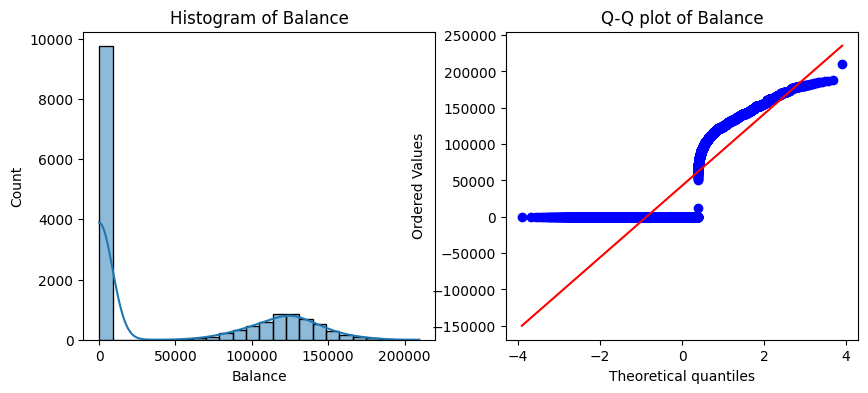

D'Agostino test for Balance: Statistic=13038.11790407539, p-value=0.0


Checking normality for column: NumOfProducts


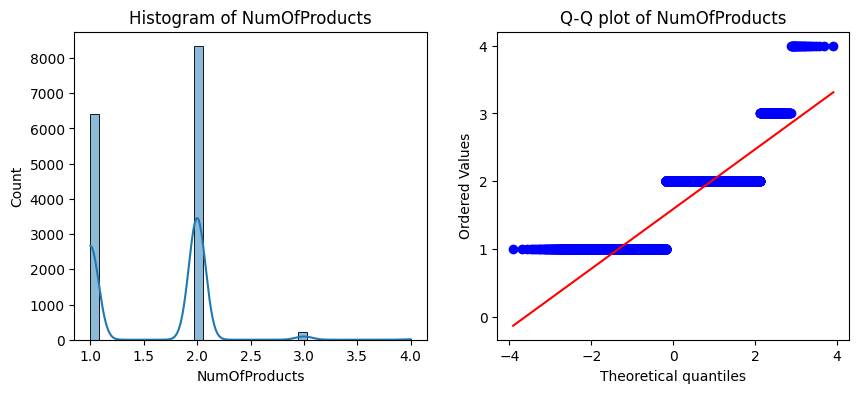

D'Agostino test for NumOfProducts: Statistic=501.746338279317, p-value=1.1147230592337466e-109


Checking normality for column: HasCrCard


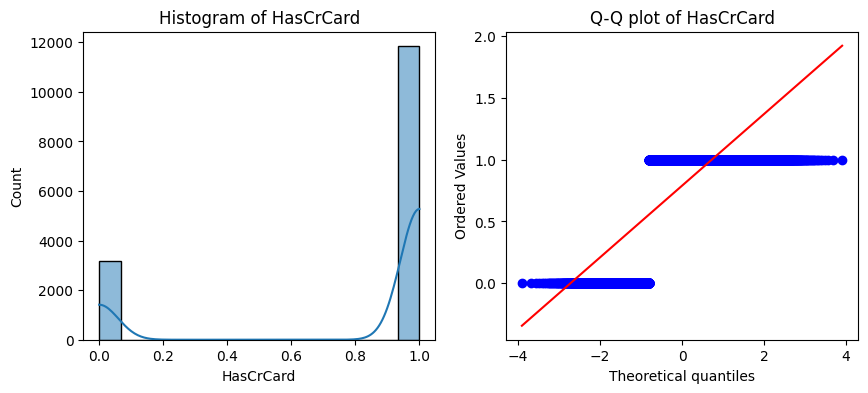

D'Agostino test for HasCrCard: Statistic=2897.484167586842, p-value=0.0


Checking normality for column: IsActiveMember


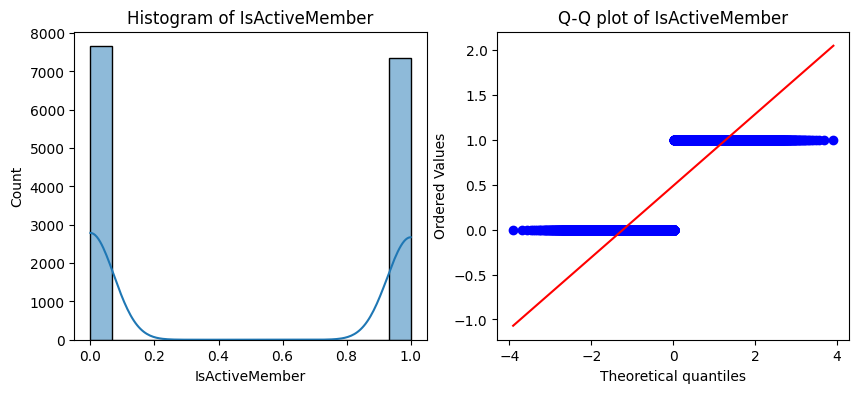

D'Agostino test for IsActiveMember: Statistic=51476.75539976713, p-value=0.0


Checking normality for column: EstimatedSalary


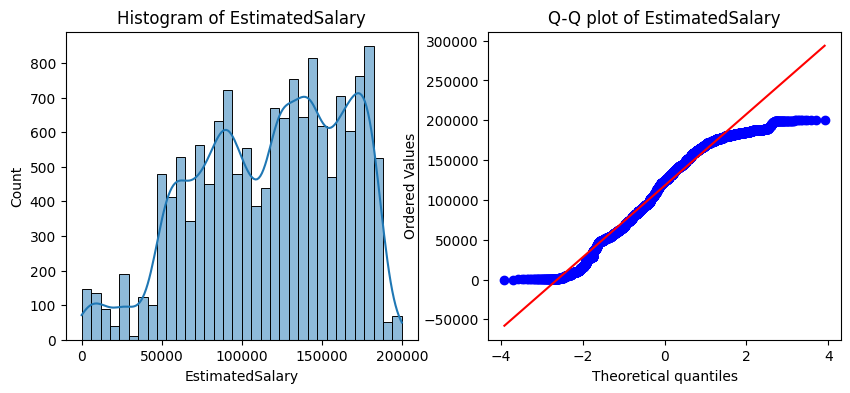

D'Agostino test for EstimatedSalary: Statistic=1088.0659447422195, p-value=5.363917947839448e-237


Checking normality for column: CreditScore


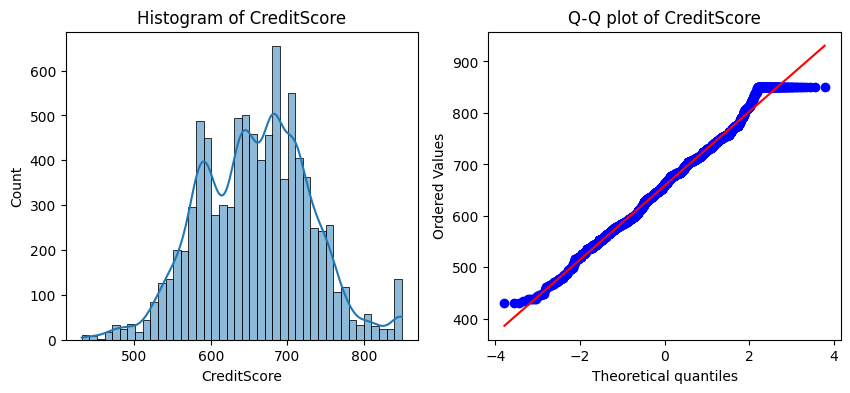

D'Agostino test for CreditScore: Statistic=2.628151140305664, p-value=0.26872262366731803


Checking normality for column: Age


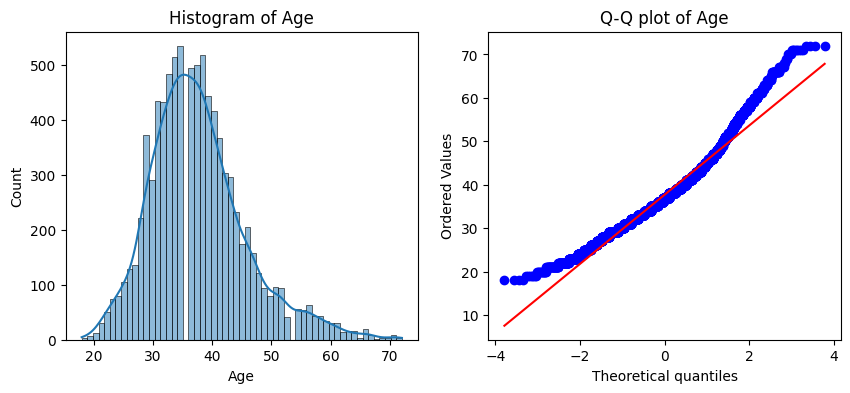

D'Agostino test for Age: Statistic=1010.0751614617375, p-value=4.623443287506375e-220


Checking normality for column: Tenure


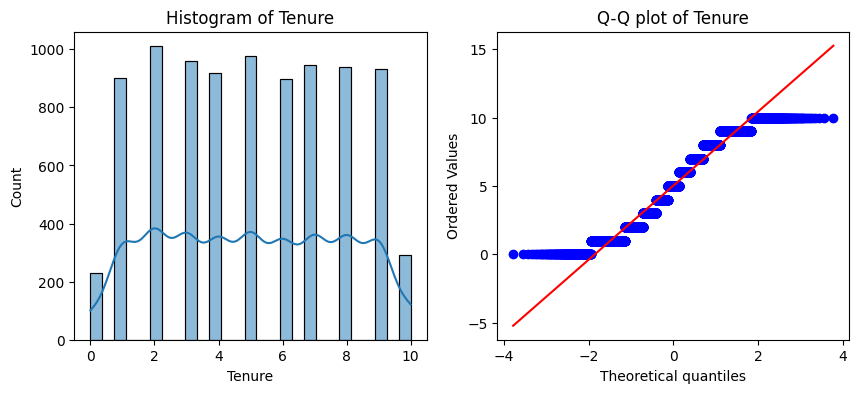

D'Agostino test for Tenure: Statistic=5448.794898176735, p-value=0.0


Checking normality for column: Balance


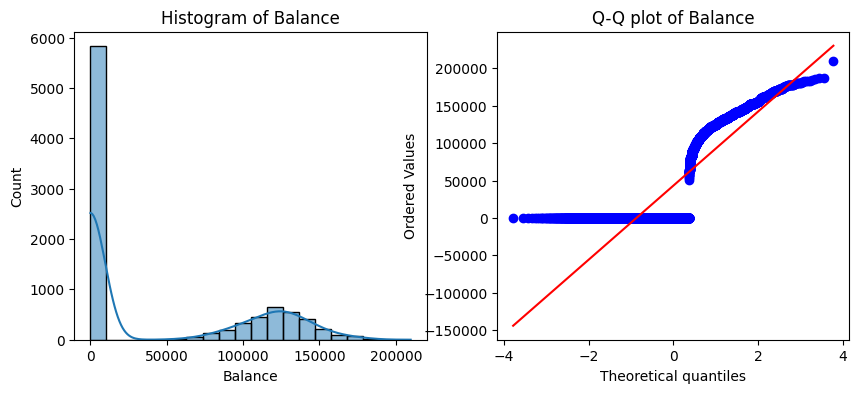

D'Agostino test for Balance: Statistic=8884.15244674895, p-value=0.0


Checking normality for column: NumOfProducts


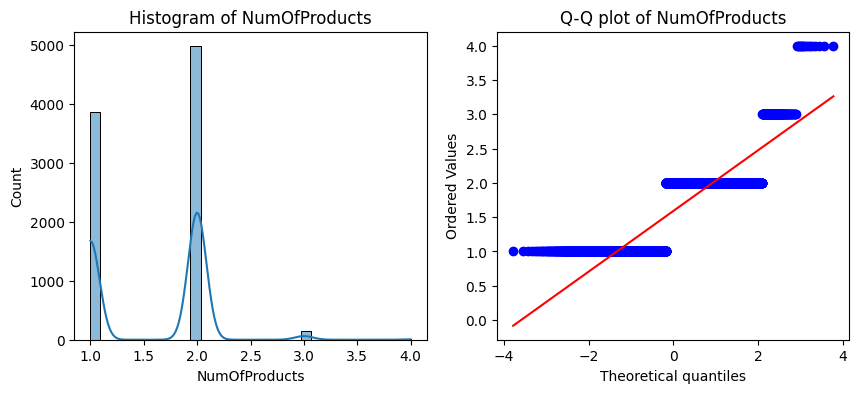

D'Agostino test for NumOfProducts: Statistic=390.8794746562254, p-value=1.3231239593284483e-85


Checking normality for column: HasCrCard


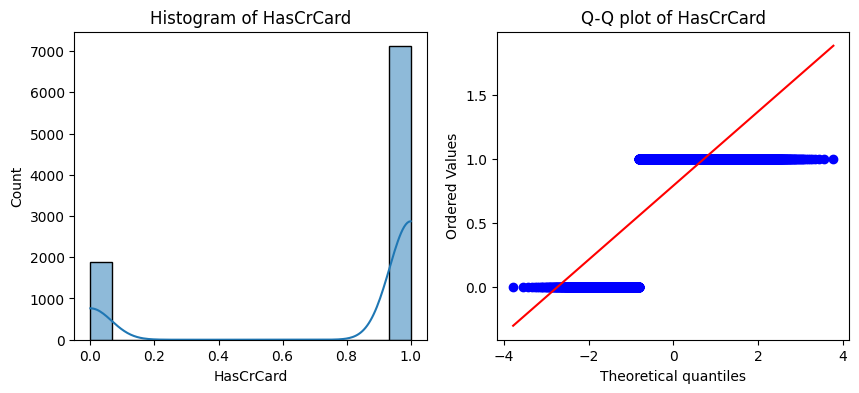

D'Agostino test for HasCrCard: Statistic=1760.4279419520171, p-value=0.0


Checking normality for column: IsActiveMember


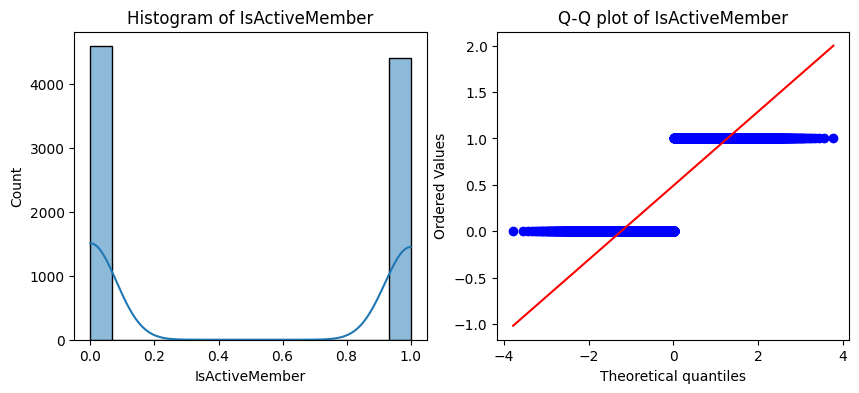

D'Agostino test for IsActiveMember: Statistic=31023.546554710934, p-value=0.0


Checking normality for column: EstimatedSalary


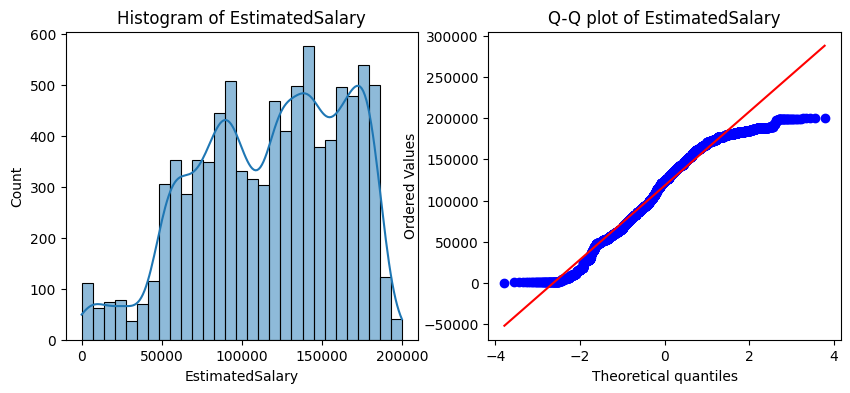

D'Agostino test for EstimatedSalary: Statistic=644.7163339885301, p-value=1.0037530500219945e-140


Checking normality for column: CreditScore


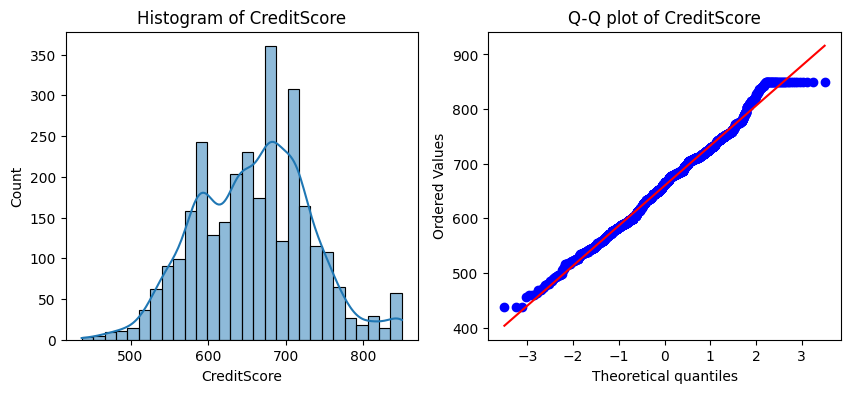

Shapiro-Wilk test for CreditScore: Statistic=0.9936658143997192, p-value=3.811778948037414e-10
D'Agostino test for CreditScore: Statistic=4.67457980291185, p-value=0.09658904968802326


Checking normality for column: Age


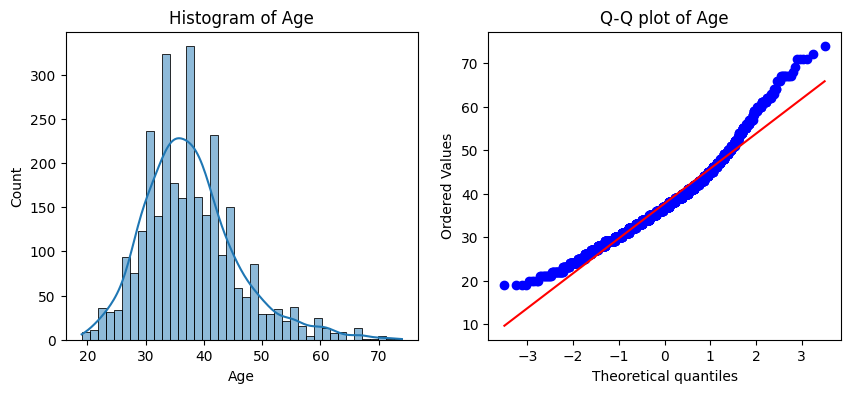

Shapiro-Wilk test for Age: Statistic=0.9597545266151428, p-value=4.422348264286165e-28
D'Agostino test for Age: Statistic=368.1462432110778, p-value=1.1430336608993354e-80


Checking normality for column: Tenure


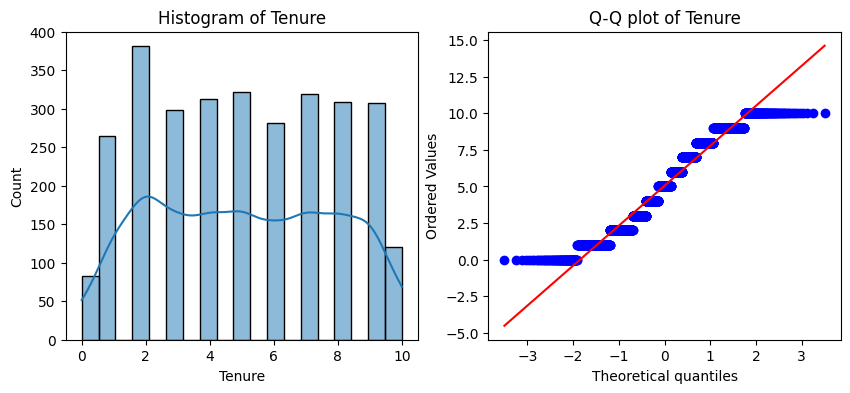

Shapiro-Wilk test for Tenure: Statistic=0.9493815898895264, p-value=5.490223007747167e-31
D'Agostino test for Tenure: Statistic=1779.0821500375685, p-value=0.0


Checking normality for column: Balance


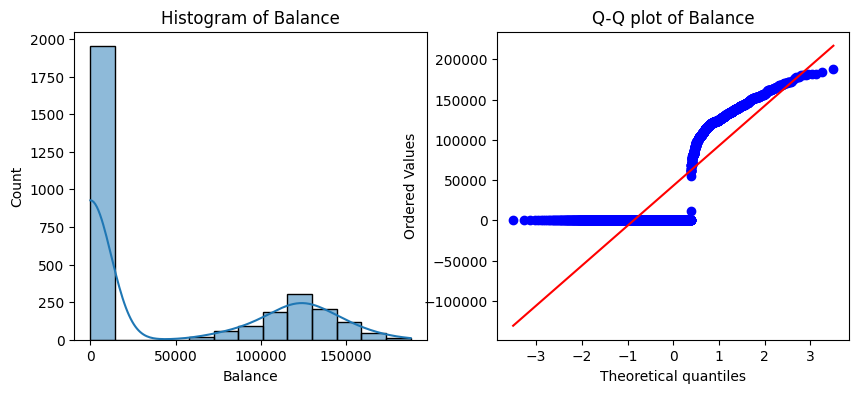

Shapiro-Wilk test for Balance: Statistic=0.6795443296432495, p-value=0.0
D'Agostino test for Balance: Statistic=2386.4850428711966, p-value=0.0


Checking normality for column: NumOfProducts


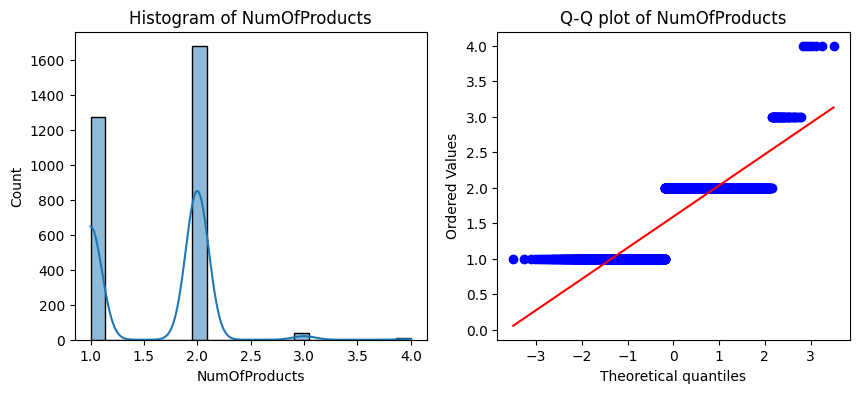

Shapiro-Wilk test for NumOfProducts: Statistic=0.6818296909332275, p-value=0.0
D'Agostino test for NumOfProducts: Statistic=66.09025309176971, p-value=4.453319837907606e-15


Checking normality for column: HasCrCard


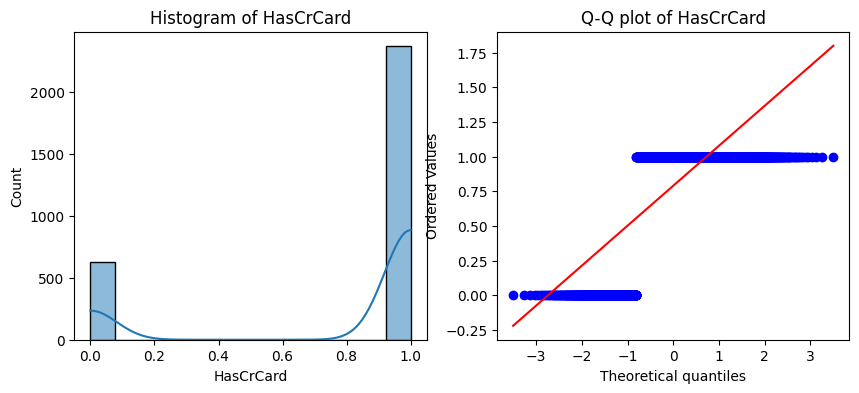

Shapiro-Wilk test for HasCrCard: Statistic=0.5006347894668579, p-value=0.0
D'Agostino test for HasCrCard: Statistic=587.928805227117, p-value=2.1521972341992508e-128


Checking normality for column: IsActiveMember


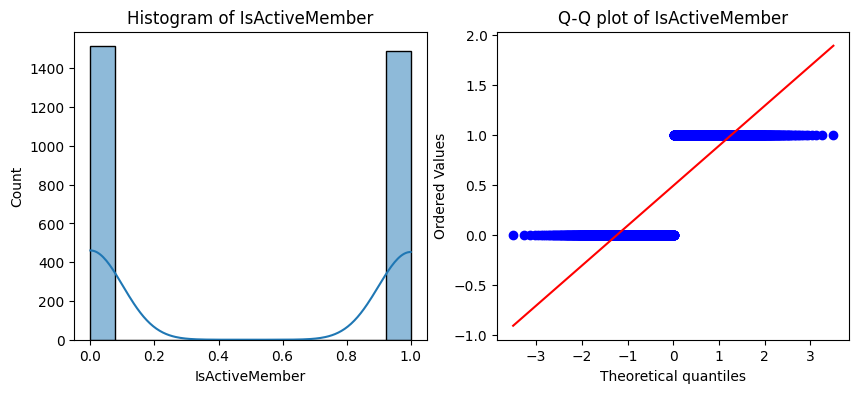

Shapiro-Wilk test for IsActiveMember: Statistic=0.6365998983383179, p-value=0.0
D'Agostino test for IsActiveMember: Statistic=10569.412953677554, p-value=0.0


Checking normality for column: EstimatedSalary


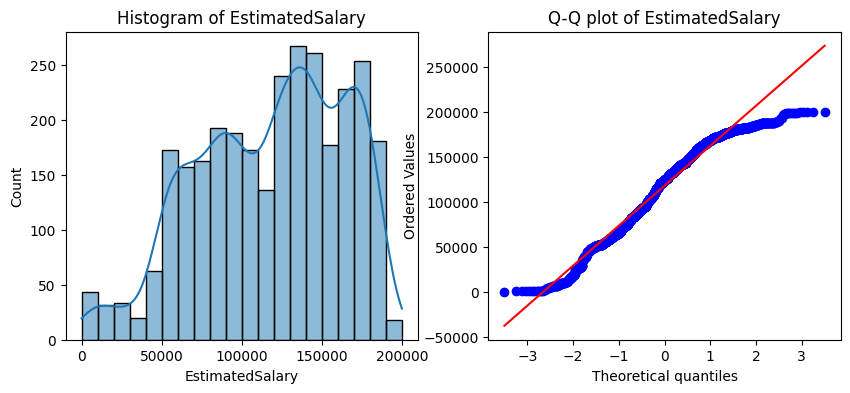

Shapiro-Wilk test for EstimatedSalary: Statistic=0.966789960861206, p-value=9.214799481534511e-26
D'Agostino test for EstimatedSalary: Statistic=222.80483993672755, p-value=4.154738908157566e-49


Checking normality for column: CreditScore


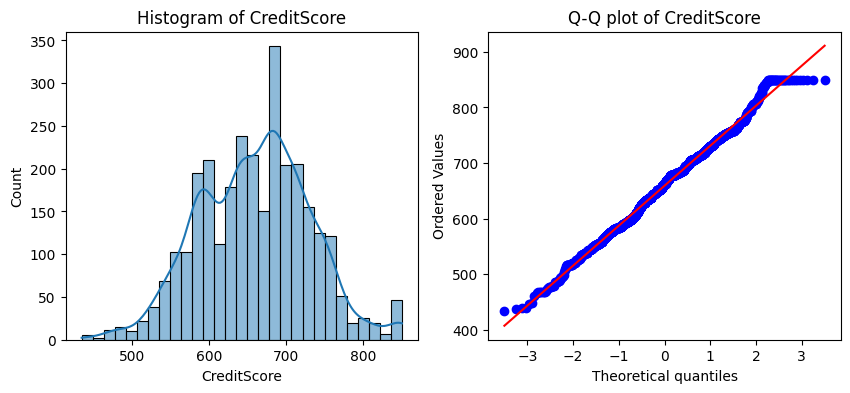

Shapiro-Wilk test for CreditScore: Statistic=0.9954118728637695, p-value=5.1776527953961704e-08
D'Agostino test for CreditScore: Statistic=0.4191779923951423, p-value=0.8109174676504678


Checking normality for column: Age


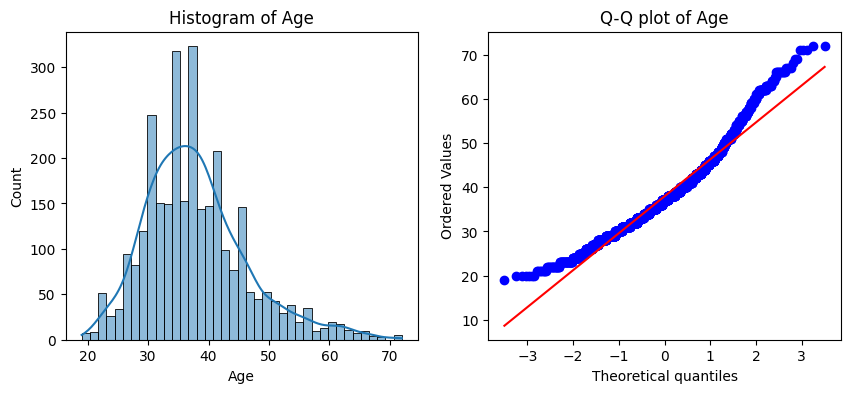

Shapiro-Wilk test for Age: Statistic=0.9582206606864929, p-value=1.5203327092179297e-28
D'Agostino test for Age: Statistic=340.1444344194752, p-value=1.3758609378868836e-74


Checking normality for column: Tenure


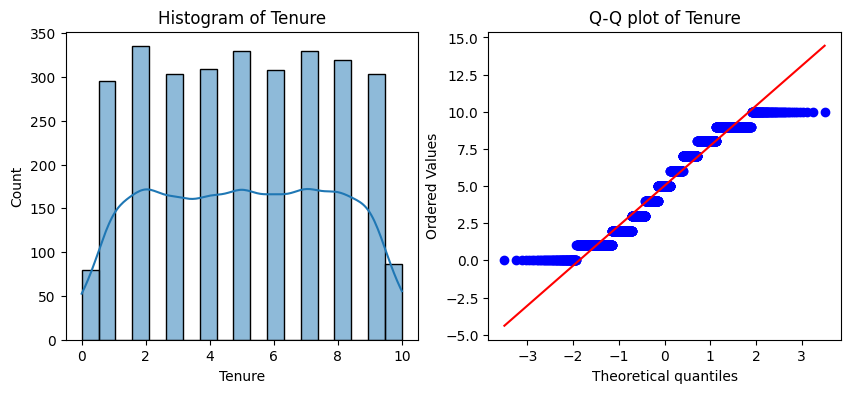

Shapiro-Wilk test for Tenure: Statistic=0.9505012035369873, p-value=1.0707323194464959e-30
D'Agostino test for Tenure: Statistic=1607.0854551786392, p-value=0.0


Checking normality for column: Balance


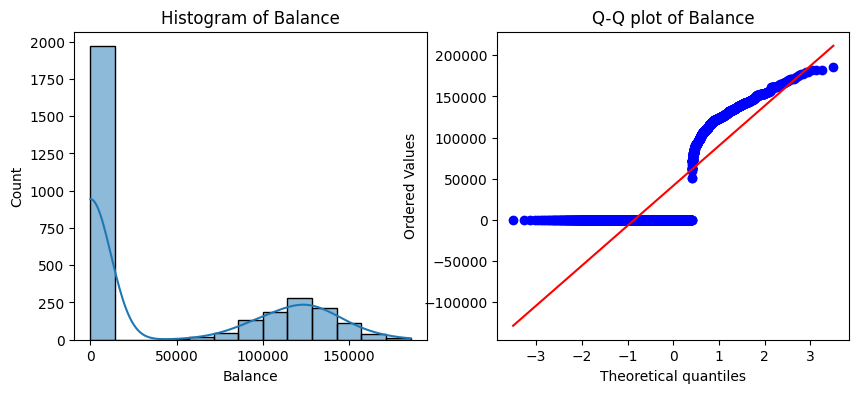

Shapiro-Wilk test for Balance: Statistic=0.6750850677490234, p-value=0.0
D'Agostino test for Balance: Statistic=1864.8422971520206, p-value=0.0


Checking normality for column: NumOfProducts


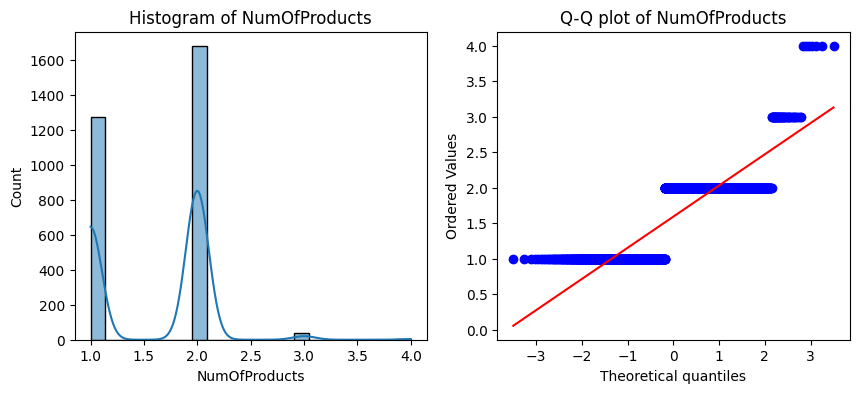

Shapiro-Wilk test for NumOfProducts: Statistic=0.6816615462303162, p-value=0.0
D'Agostino test for NumOfProducts: Statistic=65.26927056307792, p-value=6.713638895971507e-15


Checking normality for column: HasCrCard


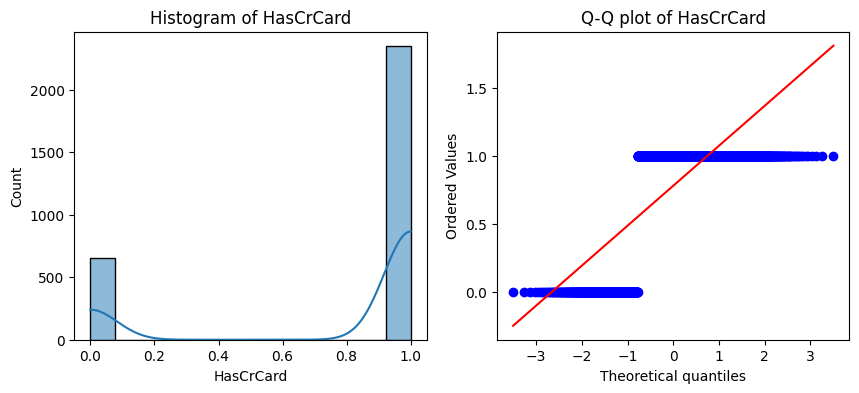

Shapiro-Wilk test for HasCrCard: Statistic=0.5081787109375, p-value=0.0
D'Agostino test for HasCrCard: Statistic=560.7741696686094, p-value=1.6960406597116037e-122


Checking normality for column: IsActiveMember


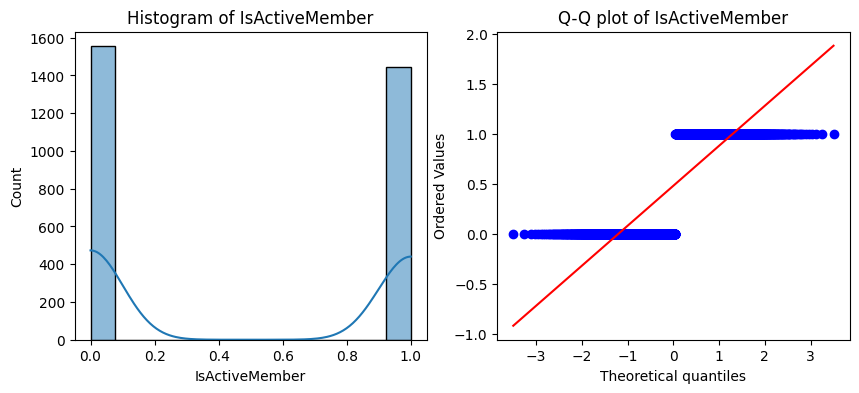

Shapiro-Wilk test for IsActiveMember: Statistic=0.6361595392227173, p-value=0.0
D'Agostino test for IsActiveMember: Statistic=10601.436136305267, p-value=0.0


Checking normality for column: EstimatedSalary


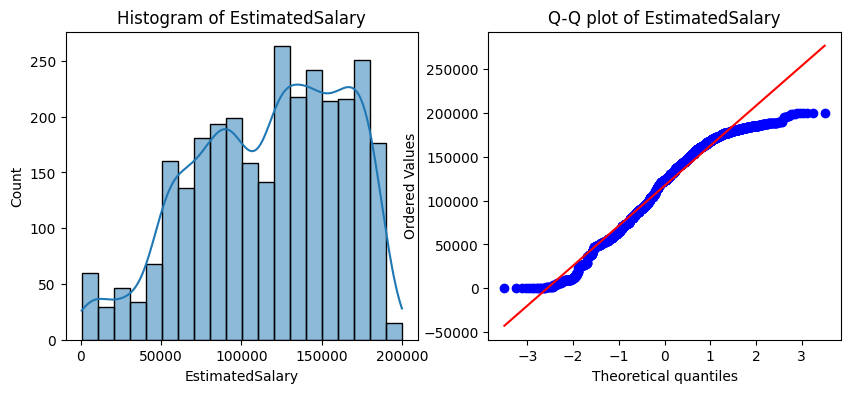

Shapiro-Wilk test for EstimatedSalary: Statistic=0.9651257991790771, p-value=2.4235471011861433e-26
D'Agostino test for EstimatedSalary: Statistic=221.1098115860697, p-value=9.696488054105837e-49




In [12]:
# Виділимо дані для аналізу з початкового набору даних
analysis_data = train_orig_df[analysis_cols]

# Перевіримо нормальність розподілу колонок для аналізу у початковому наборі даних
check_normality(analysis_data)

# Виділимо дані для аналізу з навчальної вибірки
train_analysis_data = train_df[analysis_cols]

# Перевіримо нормальність розподілу колонок для аналізу у навчальній вибірці
check_normality(train_analysis_data)

# Виділимо дані для аналізу з валідаційної вибірки
val_analysis_data = val_df[analysis_cols]

# Перевіримо нормальність розподілу колонок для аналізу у навчальній вибірці
check_normality(val_analysis_data)

# Виділимо дані для аналізу зь тестової вибірки
test_analysis_data = test_df[analysis_cols]

# Перевіримо нормальність розподілу колонок для аналізу у навчальній вибірці
check_normality(test_analysis_data)


Інтерпретація результатів:

Лише для CreditScore p-value > 0.05, що може вказувати на нормальний розподіл.
Для всіх інших колонок p-value < 0.05, що означає, що ми відхиляємо нульову гіпотезу і вважаємо, що ці колонки не мають нормального розподілу.

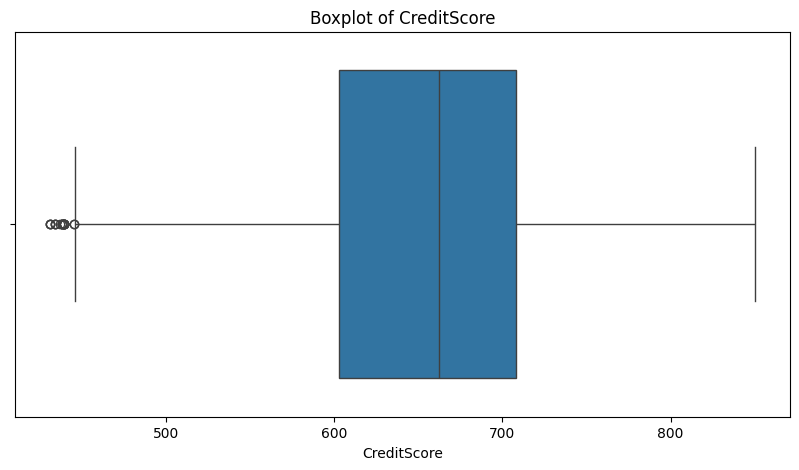

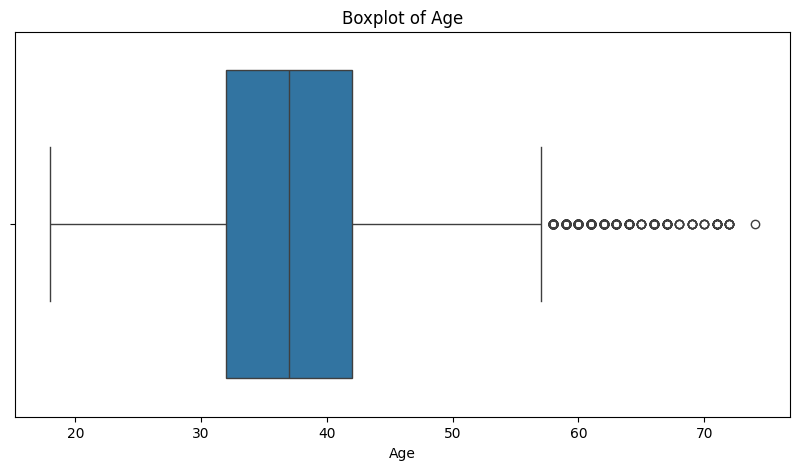

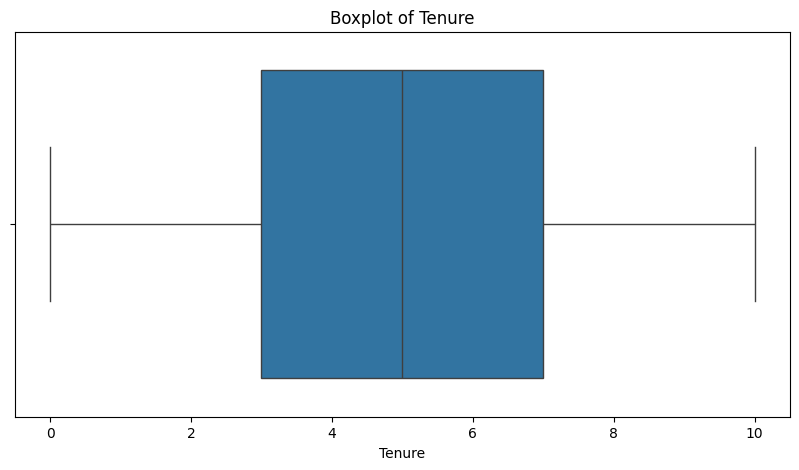

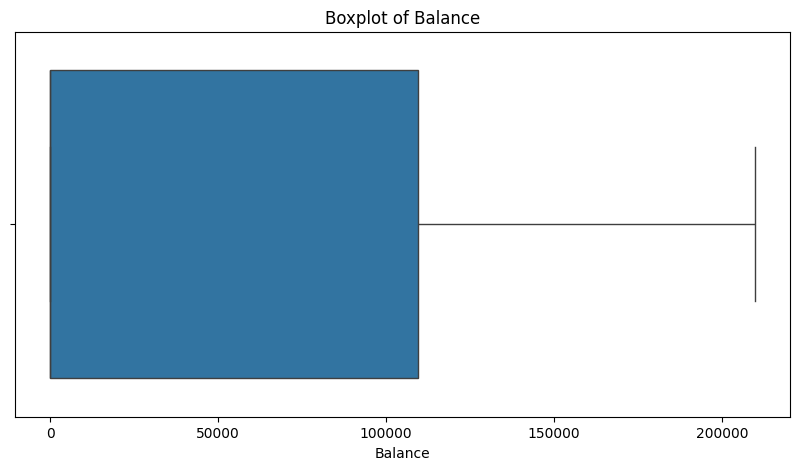

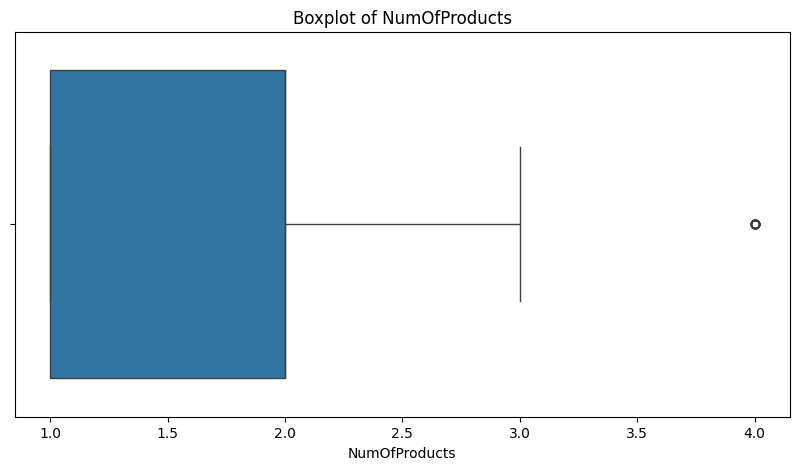

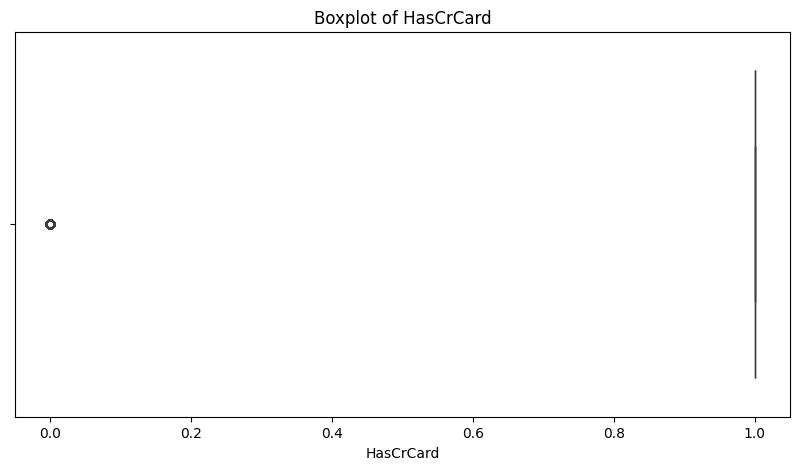

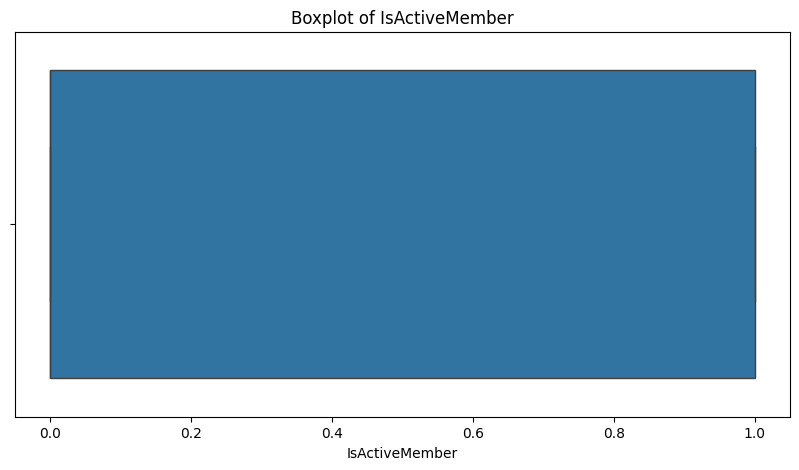

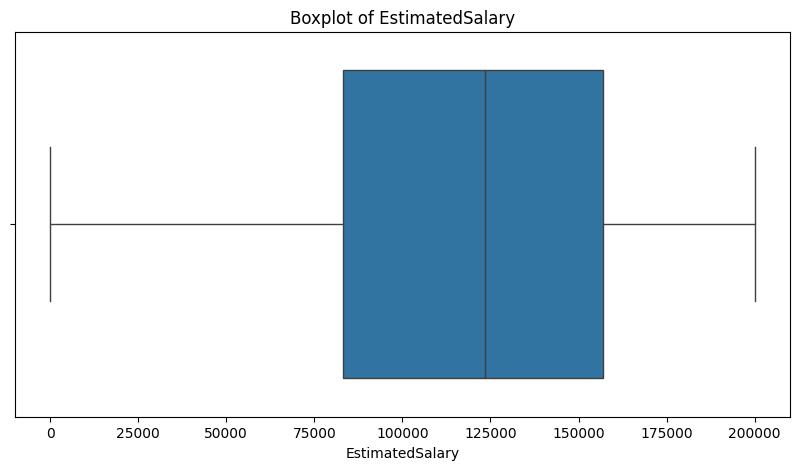

In [13]:
# Візуалізуємо викиди для кожної числової колонки
for col in analysis_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train_orig_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Виявлення викидів у початковому наборі даних
outliers_iqr = detect_outliers_iqr(train_orig_df[analysis_cols])

# Виведення кількості викидів для кожної колонки
for col, outliers in outliers_iqr.items():
    print(f'{col}: {len(outliers)} outliers')


CreditScore: 20 outliers
Age: 414 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 30 outliers
HasCrCard: 3168 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers


In [15]:
from scipy.stats import zscore

def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    z_scores = zscore(data)
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > threshold).sum(axis=0)
    return outliers

# Виявлення викидів у початковому наборі даних
outliers_zscore = detect_outliers_zscore(train_orig_df[analysis_cols])

# Виведення кількості викидів для кожної колонки
for col, count in zip(analysis_cols, outliers_zscore):
    print(f'{col}: {count} outliers')


CreditScore: 18 outliers
Age: 153 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 30 outliers
HasCrCard: 0 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers


In [16]:
def get_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Отримання викидів у початковому наборі даних
outliers_iqr = get_outliers_iqr(train_orig_df, analysis_cols)

# Виведення перших 5 викидів для кожної колонки
for col, outliers in outliers_iqr.items():
    print(f'Outliers in {col}:')
    print(outliers.head())

Outliers in CreditScore:
        id  CustomerId     Surname  CreditScore Geography  Gender   Age  \
59      59  15653050.0   Macdonald        437.0    France    Male  39.0   
553    553  15678497.0        Chiu        445.0    France    Male  45.0   
1165  1165  15614893.0       Hs?eh        439.0    France  Female  36.0   
1411  1411  15794236.0  Onwuamaeze        438.0    France  Female  35.0   
1478  1478  15700813.0      Achebe        439.0   Germany  Female  34.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
59       4.0       0.00            1.0        0.0             0.0   
553      9.0       0.00            2.0        0.0             0.0   
1165     4.0   96679.71            1.0        0.0             1.0   
1411     8.0       0.00            2.0        1.0             1.0   
1478     9.0  102772.67            2.0        1.0             1.0   

      EstimatedSalary  Exited  
59          125877.22     0.0  
553         162501.83     1.0  
1165         

In [17]:
outliers_credit_score = get_outliers_iqr(train_orig_df, ['CreditScore'])
print("Outliers in 'CreditScore':")
display(outliers_credit_score['CreditScore'])

Outliers in 'CreditScore':


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
59,59,15653050.0,Macdonald,437.0,France,Male,39.0,4.0,0.00,1.0,0.0,0.0,125877.22,0.0
553,553,15678497.0,Chiu,445.0,France,Male,45.0,9.0,0.00,2.0,0.0,0.0,162501.83,1.0
1165,1165,15614893.0,Hs?eh,439.0,France,Female,36.0,4.0,96679.71,1.0,0.0,1.0,85516.37,0.0
1411,1411,15794236.0,Onwuamaeze,438.0,France,Female,35.0,8.0,0.00,2.0,1.0,1.0,74593.84,0.0
1478,1478,15700813.0,Achebe,439.0,Germany,Female,34.0,9.0,102772.67,2.0,1.0,1.0,119216.46,0.0
4505,4505,15747174.0,Teng,431.0,France,Male,34.0,3.0,0.00,2.0,0.0,0.0,97413.00,0.0
5655,5655,15640667.0,Kable,434.0,Spain,Male,22.0,7.0,0.00,2.0,1.0,1.0,118545.49,0.0
6511,6511,15775231.0,Ch'ien,439.0,France,Female,26.0,5.0,0.00,2.0,1.0,1.0,44965.44,0.0
6887,6887,15635244.0,Fan,439.0,Germany,Female,28.0,7.0,119074.28,2.0,0.0,1.0,165576.55,0.0
7614,7614,15713483.0,Trevisan,438.0,France,Female,30.0,6.0,0.00,2.0,0.0,1.0,82872.64,0.0


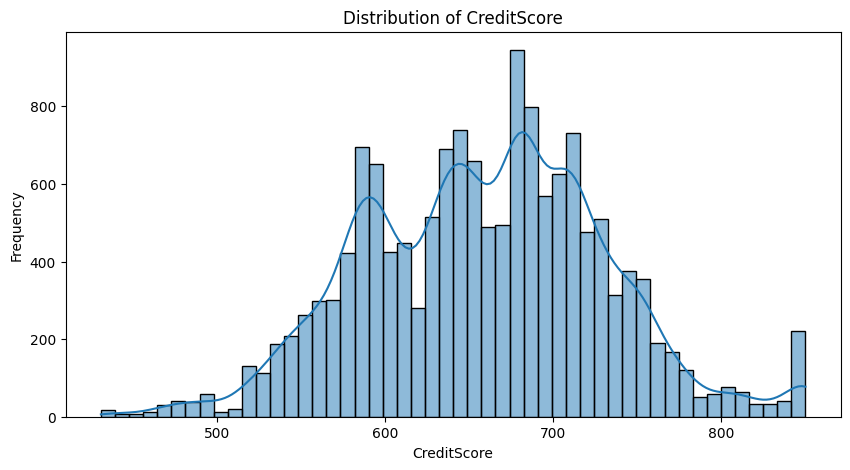

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(train_orig_df['CreditScore'], kde=True)
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

В разі якщо модель буде працювати погано, то я спробую покращити її видаливши ці 20 CreditScore, але наразі суттєвих викидів немає і ми можемо залишити всі дані, як є.